### Loading Dependencies

In [1]:
import pandas as pd
import numpy as np
import fxcmpy

### Reading Data from a CSV file

The dataset as downloaded from the MT4 platform doesn't come with headers. You have to add them yourself using the "names" parameter in the "read_csv" method.

In [2]:
%time data = pd.read_csv('GBPJPY1440.csv', index_col=0, parse_dates=True, names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"]) 
data.head()

Wall time: 1.99 s


,Time,Open,High,Low,Close,Volume
Date,,,,,,
1993-04-19,00:00,169.78,171.31,169.44,170.72,2801
1993-04-20,00:00,170.76,172.24,170.09,170.79,4271
1993-04-21,00:00,170.69,171.79,170.05,170.54,3331
1993-04-22,00:00,169.84,171.87,168.79,170.37,5631
1993-04-23,00:00,172.16,174.67,171.64,174.36,3861


In [3]:
data.drop(data.loc[:, ["Time", "Open", "High", "Low",  "Volume"]], inplace=True, axis=1)
data.head()

,Close
Date,
1993-04-19,170.72
1993-04-20,170.79
1993-04-21,170.54
1993-04-22,170.37
1993-04-23,174.36


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6541 entries, 1993-04-19 to 2018-09-25
Data columns (total 1 columns):
Close    6541 non-null float64
dtypes: float64(1)
memory usage: 102.2 KB


### Visualizing our Data

In [5]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

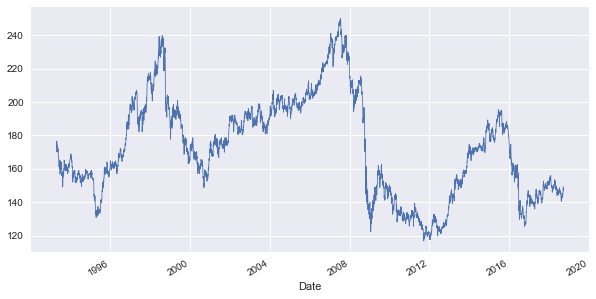

In [6]:
data['Close'].plot(figsize=(10, 5), lw=0.8)

I chose my parameters for the plot function based off the price range I saw when I visualised it earlier. You could run some further statistical test like standard deviation just to see the variation from the mean.

### Adding some statistics

In [7]:
ea = data.loc['2015-1-1':]

In [8]:
ea['SMA1'] = ea['Close'].rolling(10).mean()
ea['SMA2'] = ea['Close'].rolling(72).mean()

C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
ea.dropna(inplace=True)

C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


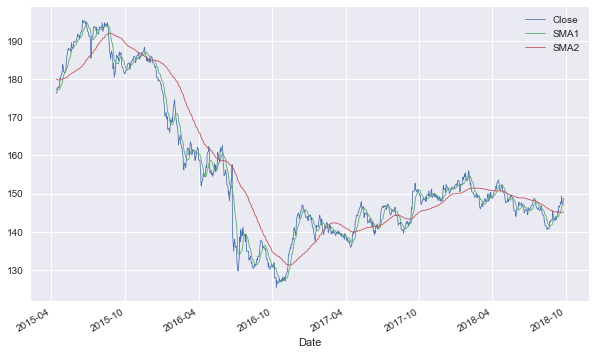

In [10]:
ea[['Close', 'SMA1', 'SMA2']].plot(figsize=(10, 6), lw=0.8)

### Deriving Positions

In [11]:
ea['Positions'] = np.where(ea['SMA1'] > ea['SMA2'], 1, -1)

C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


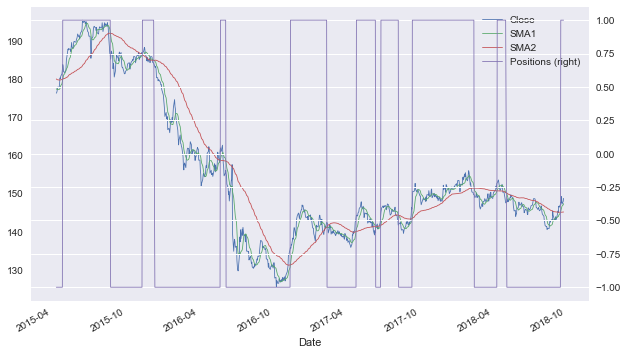

In [12]:
ea[['Close', 'SMA1', 'SMA2', 'Positions']].plot(figsize=(10, 6), secondary_y='Positions', lw=0.8)

### Backtesting the Strategy

In [13]:
ea['Returns'] = np.log(ea['Close']/ea['Close'].shift(1))

C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
ea['Strategy'] = ea['Positions'].shift(1) * ea['Returns']

C:\Users\Siseng Consulting\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


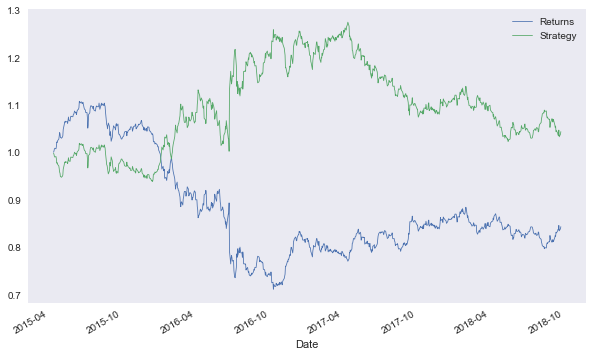

In [15]:
ea[['Returns', 'Strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6), secondary_y='Positions', lw=0.8)

### Reading Tick Data from FXCM

In [16]:
import plotly
plotly.__version__

'3.4.0'

In [17]:
TOKEN = 'dcd768998300581061b48dd811c985ae0903806f'
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')

instruments = con.get_instruments()
print(instruments[:5])

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF']


In [27]:
print(instruments[-1])

BTC/USD


In [21]:
len(instruments)

62